<a href="https://colab.research.google.com/github/ravitejalakkoju/covid-19-prediction-fyp/blob/main/Covid_Detection_Larger_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import opendatasets as od
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
%matplotlib inline
from torchvision.datasets import ImageFolder
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib

In [ ]:
kaggle_dataset_url="https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia"

In [ ]:
github_dataset_url="https://github.com/education454/datasets.git"

In [ ]:
od.download(kaggle_dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: raviteja2000
Your Kaggle Key: ··········


  0%|          | 10.0M/2.29G [00:00<00:23, 105MB/s]

100%|██████████| 2.29G/2.29G [00:18<00:00, 130MB/s]


In [ ]:
!git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 41.41 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [ ]:
kaggle_dir='./chest-xray-pneumonia/chest_xray'
ktrain_dir = os.path.join(kaggle_dir, 'train')
ktest_dir = os.path.join(kaggle_dir, 'test')
kval_dir = os.path.join(kaggle_dir, 'val')
train_pneumonia_dir = os.path.join(ktrain_dir, 'PNEUMONIA')
train_normal_dir = os.path.join(ktrain_dir, 'NORMAL')
test_pneumonia_dir = os.path.join(ktest_dir, 'PNEUMONIA')
test_normal_dir = os.path.join(ktest_dir, 'NORMAL')
val_pneumonia_dir = os.path.join(kval_dir, 'PNEUMONIA')
val_normal_dir = os.path.join(kval_dir, 'NORMAL')

In [ ]:
base_dir = "/content/drive/MyDrive/CategoricalDataSet"

In [ ]:
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
train_covid_dir = os.path.join(train_dir, 'COVID19')
train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')
train_normal_dir = os.path.join(train_dir, 'NORMAL')
test_covid_dir = os.path.join(test_dir, 'COVID19')
test_pneumonia_dir = os.path.join(test_dir, 'PNEUMONIA')
test_normal_dir = os.path.join(test_dir, 'NORMAL')

In [ ]:
github_dir = './datasets/Data'
gtrain_dir = os.path.join(github_dir, 'train')
gtest_dir = os.path.join(github_dir, 'test')
train_covid_dir = os.path.join(gtrain_dir, 'COVID19')
test_covid_dir = os.path.join(gtest_dir, 'COVID19')
# train_normal_dir = os.path.join(gtrain_dir, 'NORMAL')
# test_normal_dir = os.path.join(gtest_dir, 'NORMAL')

In [ ]:
ktrain_dir = pathlib.Path(ktrain_dir)
ktest_dir = pathlib.Path(ktest_dir)
kval_dir = pathlib.Path(kval_dir)
print("TOTAL: %3d, PNEUMONIA: %3d, NORMAL: %3d" % (len(list(ktrain_dir.glob('*/*'))), len(list(ktrain_dir.glob('*PNEUMONIA/*'))), len(list(ktrain_dir.glob('*NORMAL/*')))))
print("TOTAL: %3d, PNEUMONIA: %3d, NORMAL: %3d" % (len(list(ktest_dir.glob('*/*'))), len(list(ktest_dir.glob('*PNEUMONIA/*'))), len(list(ktest_dir.glob('*NORMAL/*')))))
print("TOTAL: %3d, PNEUMONIA: %3d, NORMAL: %3d" % (len(list(kval_dir.glob('*/*'))), len(list(kval_dir.glob('*PNEUMONIA/*'))), len(list(kval_dir.glob('*NORMAL/*')))))

TOTAL: 5216, PNEUMONIA: 3875, NORMAL: 1341
TOTAL: 624, PNEUMONIA: 390, NORMAL: 234
TOTAL:  16, PNEUMONIA:   8, NORMAL:   8


In [ ]:
gtrain_dir = pathlib.Path(gtrain_dir)
gtest_dir = pathlib.Path(gtest_dir)
print("TOTAL: %3d, COVID19: %3d, NORMAL: %3d" % (len(list(gtrain_dir.glob('*/*'))), len(list(gtrain_dir.glob('*COVID19/*'))), len(list(gtrain_dir.glob('*NORMAL/*')))))
print("TOTAL: %3d, COVID19: %3d, NORMAL: %3d" % (len(list(gtest_dir.glob('*/*'))), len(list(gtest_dir.glob('*COVID19/*'))), len(list(gtest_dir.glob('*NORMAL/*')))))

TOTAL: 1811, COVID19: 545, NORMAL: 1266
TOTAL: 484, COVID19: 167, NORMAL: 317


In [ ]:
train_pneumonia_names = os.listdir(train_pneumonia_dir)
print(train_pneumonia_names[:10])

train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_pneumonia_names = os.listdir(test_pneumonia_dir)
print(train_pneumonia_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(train_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(train_normal_names[:10])

['person504_bacteria_2130.jpeg', 'person1338_virus_2308.jpeg', 'person1481_bacteria_3867.jpeg', 'person1454_bacteria_3774.jpeg', 'person382_bacteria_1739.jpeg', 'person1473_virus_2551.jpeg', 'person442_virus_903.jpeg', 'person1060_virus_1760.jpeg', 'person701_bacteria_2600.jpeg', 'person605_bacteria_2466.jpeg']
['COVID19(487).jpg', 'COVID19(515).jpg', 'COVID-19 (8).jpeg', 'COVID-19 (192).jpg', 'COVID19(204).jpg', 'COVID19(341).jpg', 'COVID19(456).jpg', 'COVID19(271).jpg', 'COVID19(4).jpg', 'COVID19(553).jpg']
['IM-0752-0001.jpeg', 'IM-0180-0001.jpeg', 'IM-0521-0001.jpeg', 'NORMAL2-IM-1176-0001.jpeg', 'IM-0666-0001.jpeg', 'NORMAL2-IM-1128-0001.jpeg', 'NORMAL2-IM-1141-0001.jpeg', 'IM-0733-0001.jpeg', 'IM-0562-0001.jpeg', 'IM-0379-0001.jpeg']
['person504_bacteria_2130.jpeg', 'person1338_virus_2308.jpeg', 'person1481_bacteria_3867.jpeg', 'person1454_bacteria_3774.jpeg', 'person382_bacteria_1739.jpeg', 'person1473_virus_2551.jpeg', 'person442_virus_903.jpeg', 'person1060_virus_1760.jpeg', '

['./datasets/Data/train/COVID19/COVID19(487).jpg', './datasets/Data/train/COVID19/COVID19(515).jpg', './datasets/Data/train/COVID19/COVID-19 (8).jpeg', './datasets/Data/train/COVID19/COVID-19 (192).jpg']
['./chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person504_bacteria_2130.jpeg', './chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1338_virus_2308.jpeg', './chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1481_bacteria_3867.jpeg', './chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1454_bacteria_3774.jpeg']
['./chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0752-0001.jpeg', './chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0180-0001.jpeg', './chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0521-0001.jpeg', './chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-1176-0001.jpeg']


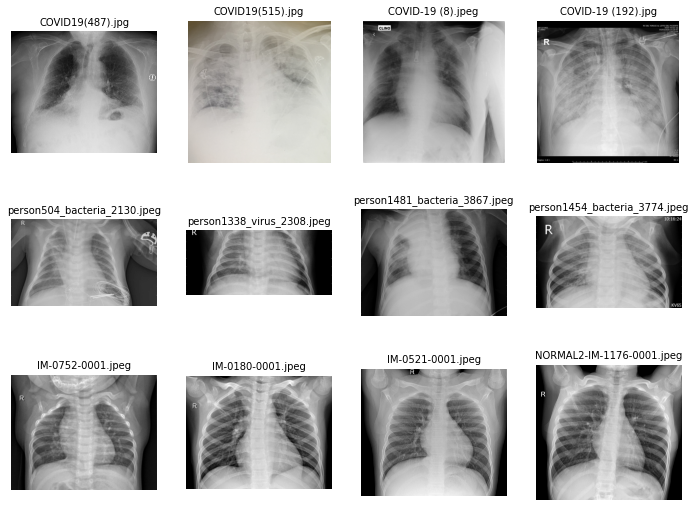

In [ ]:
import matplotlib.image as mpimg

nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(12,12)

next_covid_pic = [os.path.join(train_covid_dir, fname)for fname in train_covid_names[0:4]]
next_pneumonia_pic = [os.path.join(train_pneumonia_dir, fname)for fname in train_pneumonia_names[0:4]]
next_normal_pic = [os.path.join(train_normal_dir, fname)for fname in train_normal_names[0:4]]

print(next_covid_pic)
print(next_pneumonia_pic)
print(next_normal_pic)

for i , img_path in enumerate(next_covid_pic + next_pneumonia_pic + next_normal_pic) : 
  data = img_path.split('/', 5)[5]
  sp = plt.subplot(nrows, ncols,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data, fontsize = 10)
  plt.imshow(img, cmap = 'gray')

In [ ]:
categorical_test_df = pd.DataFrame(columns =['class', 'o_directory', 'i_directory'])
categorical_train_df = pd.DataFrame(columns =['class', 'o_directory', 'i_directory'])
for dirpath, dirnames, filenames in os.walk(train_normal_dir):
    for filename in filenames:
        categorical_train_df.loc[-1] = ["NORMAL", ('NORMAL/' + filename), (train_normal_dir + '/' +filename) ] 
        categorical_train_df.index = categorical_train_df.index + 1 
        categorical_train_df = categorical_train_df.sort_index()
for dirpath, dirnames, filenames in os.walk(test_normal_dir):
    for filename in filenames:
        categorical_test_df.loc[-1] = ["NORMAL", ('NORMAL/' + filename), (test_normal_dir + '/' +filename)] 
        categorical_test_df.index = categorical_test_df.index + 1 
        categorical_test_df = categorical_test_df.sort_index()  
for dirpath, dirnames, filenames in os.walk(val_normal_dir):
    for filename in filenames:
        categorical_test_df.loc[-1] = ["NORMAL", ('NORMAL/' + filename), (val_normal_dir + '/' +filename)] 
        categorical_test_df.index = categorical_test_df.index + 1 
        categorical_test_df = categorical_test_df.sort_index()  
for dirpath, dirnames, filenames in os.walk(train_covid_dir):
    for filename in filenames:
        categorical_train_df.loc[-1] = ["COVID19", ('COVID19/' + filename), (train_covid_dir + '/' +filename)] 
        categorical_train_df.index = categorical_train_df.index + 1 
        categorical_train_df = categorical_train_df.sort_index() 
for dirpath, dirnames, filenames in os.walk(test_covid_dir):
    for filename in filenames:
        categorical_test_df.loc[-1] = ["COVID19", ('COVID19/' + filename), (test_covid_dir + '/' +filename)] 
        categorical_test_df.index = categorical_test_df.index + 1 
        categorical_test_df = categorical_test_df.sort_index() 
for dirpath, dirnames, filenames in os.walk(train_pneumonia_dir):
    for filename in filenames:
        categorical_train_df.loc[-1] = ["PNEUMONIA", ('PNEUMONIA/' + filename), (train_pneumonia_dir + '/' +filename)] 
        categorical_train_df.index = categorical_train_df.index + 1 
        categorical_train_df = categorical_train_df.sort_index() 
for dirpath, dirnames, filenames in os.walk(test_pneumonia_dir):
    for filename in filenames:
        categorical_test_df.loc[-1] = ["PNEUMONIA", ('PNEUMONIA/' + filename), (test_pneumonia_dir + '/' +filename)] 
        categorical_test_df.index = categorical_test_df.index + 1 
        categorical_test_df = categorical_test_df.sort_index() 
for dirpath, dirnames, filenames in os.walk(val_pneumonia_dir):
    for filename in filenames:
        categorical_test_df.loc[-1] = ["PNEUMONIA", ('PNEUMONIA/' + filename), (val_pneumonia_dir + '/' +filename)] 
        categorical_test_df.index = categorical_test_df.index + 1 
        categorical_test_df = categorical_test_df.sort_index() 

In [ ]:
categorical_train_df

,class,o_directory,i_directory
0,PNEUMONIA,PNEUMONIA/person976_virus_1651.jpeg,./chest-xray-pneumonia/chest_xray/train/PNEUMO...
1,PNEUMONIA,PNEUMONIA/person933_bacteria_2858.jpeg,./chest-xray-pneumonia/chest_xray/train/PNEUMO...
2,PNEUMONIA,PNEUMONIA/person301_virus_622.jpeg,./chest-xray-pneumonia/chest_xray/train/PNEUMO...
3,PNEUMONIA,PNEUMONIA/person264_bacteria_1231.jpeg,./chest-xray-pneumonia/chest_xray/train/PNEUMO...
4,PNEUMONIA,PNEUMONIA/person513_virus_1030.jpeg,./chest-xray-pneumonia/chest_xray/train/PNEUMO...
...,...,...,...
5756,NORMAL,NORMAL/IM-0666-0001.jpeg,./chest-xray-pneumonia/chest_xray/train/NORMAL...
5757,NORMAL,NORMAL/NORMAL2-IM-1176-0001.jpeg,./chest-xray-pneumonia/chest_xray/train/NORMAL...
5758,NORMAL,NORMAL/IM-0521-0001.jpeg,./chest-xray-pneumonia/chest_xray/train/NORMAL...
5759,NORMAL,NORMAL/IM-0180-0001.jpeg,./chest-xray-pneumonia/chest_xray/train/NORMAL...


In [ ]:
categorical_test_df

,class,o_directory,i_directory
0,PNEUMONIA,PNEUMONIA/person1947_bacteria_4876.jpeg,./chest-xray-pneumonia/chest_xray/val/PNEUMONI...
1,PNEUMONIA,PNEUMONIA/person1952_bacteria_4883.jpeg,./chest-xray-pneumonia/chest_xray/val/PNEUMONI...
2,PNEUMONIA,PNEUMONIA/person1949_bacteria_4880.jpeg,./chest-xray-pneumonia/chest_xray/val/PNEUMONI...
3,PNEUMONIA,PNEUMONIA/person1946_bacteria_4875.jpeg,./chest-xray-pneumonia/chest_xray/val/PNEUMONI...
4,PNEUMONIA,PNEUMONIA/person1946_bacteria_4874.jpeg,./chest-xray-pneumonia/chest_xray/val/PNEUMONI...
...,...,...,...
885,NORMAL,NORMAL/NORMAL(869).jpg,./datasets/Data/test/NORMAL/NORMAL(869).jpg
886,NORMAL,NORMAL/NORMAL(326).jpg,./datasets/Data/test/NORMAL/NORMAL(326).jpg
887,NORMAL,NORMAL/NORMAL(1100).jpg,./datasets/Data/test/NORMAL/NORMAL(1100).jpg
888,NORMAL,NORMAL/NORMAL(136).jpg,./datasets/Data/test/NORMAL/NORMAL(136).jpg


In [ ]:
def copy_images_categorical(df, directory):
    
    # input and output directory
    output_path = "CategoricalDataSet/" + directory

    # remove all files from previous fold
    if os.path.exists(output_path):
        shutil.rmtree(output_path)

    # create folder for files from this fold
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    # create subfolders for each class
    classs=['NORMAL','COVID19','PNEUMONIA']
    for c in classs:
        if not os.path.exists(output_path + '/' + c):
            os.makedirs(output_path + '/' + c)
        
    # copy files
    for i, row in df.iterrows():
        path_from = row['i_directory']
        path_to = "{}/{}".format(output_path, (row['i_directory'].split('/')[-2]  + '/' + row['i_directory'].split('/')[-1]))
        shutil.copy(path_from, path_to)

In [ ]:
copy_images_categorical(categorical_test_df, 'test')
copy_images_categorical(categorical_train_df, 'train')

In [ ]:
print(len(os.listdir('./CategoricalDataSet/test/NORMAL')))
print(len(os.listdir('./CategoricalDataSet/test/COVID19')))
print(len(os.listdir('./CategoricalDataSet/test/PNEUMONIA')))

242
167
398


In [ ]:
print(len(os.listdir('./CategoricalDataSet/train/NORMAL')))
print(len(os.listdir('./CategoricalDataSet/train/COVID19')))
print(len(os.listdir('./CategoricalDataSet/train/PNEUMONIA')))

1341
545
3875


In [ ]:
train_dir = './CategoricalDataSet/train'
test_dir = './CategoricalDataSet/test'

In [ ]:
train_dir = pathlib.Path(train_dir)
image_count = len(list(train_dir.glob('*/*')))
print(image_count)

5761


In [ ]:
test_dir = pathlib.Path(test_dir)
image_count = len(list(test_dir.glob('*/*')))
print(image_count)

890


In [ ]:
train_dir = pathlib.Path(train_dir)
test_dir = pathlib.Path(test_dir)
print("TOTAL: %3d, PNEUMONIA: %3d, COVID19: %3d, NORMAL: %3d" % (len(list(train_dir.glob('*/*'))), len(list(train_dir.glob('*PNEUMONIA/*'))), len(list(train_dir.glob('*COVID19/*'))), len(list(train_dir.glob('*NORMAL/*')))))
print("TOTAL: %3d, PNEUMONIA: %3d, COVID19: %3d, NORMAL: %3d" % (len(list(test_dir.glob('*/*'))), len(list(test_dir.glob('*PNEUMONIA/*'))), len(list(test_dir.glob('*COVID19/*'))), len(list(test_dir.glob('*NORMAL/*')))))

TOTAL: 11037, PNEUMONIA: 3883, COVID19: 4539, NORMAL: 2615
TOTAL: 1486, PNEUMONIA: 390, COVID19: 545, NORMAL: 551


In [ ]:
train_data_gen = ImageDataGenerator(rescale  = 1./255, 
                                    validation_split=0.15,
                                    horizontal_flip = True,
                                    fill_mode='nearest')

test_data_gen = ImageDataGenerator(rescale  = 1./255)


train_generator = train_data_gen.flow_from_directory(train_dir,
                                                     target_size = (256,256),
                                                     subset = 'training', 
                                                     batch_size = 32,
                                                     class_mode = 'categorical',
                                                     color_mode='grayscale')

val_generator = train_data_gen.flow_from_directory(train_dir,
                                                     target_size = (256,256),
                                                     subset = 'validation', 
                                                     batch_size = 32,
                                                     class_mode = 'categorical',
                                                     color_mode='grayscale')

test_generator = test_data_gen.flow_from_directory(test_dir,
                                                     target_size = (256,256),
                                                     batch_size = 32,
                                                     class_mode = 'categorical',
                                                     color_mode='grayscale')

Found 9383 images belonging to 3 classes.
Found 1654 images belonging to 3 classes.
Found 1486 images belonging to 3 classes.


In [ ]:
class_names = os.listdir(train_dir)

KeyboardInterrupt: ignored

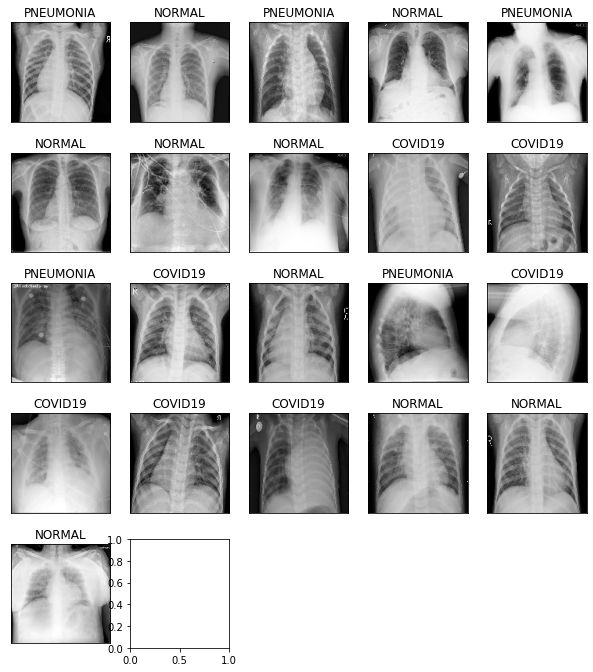

In [ ]:
from matplotlib import pyplot

for i in range(25):
  pyplot.subplot(5, 5, i + 1)
  img, labels = train_generator.next()
  image = img[0]
  pyplot.xticks([])
  pyplot.yticks([])
  pyplot.subplots_adjust(top=1, left=0.5)
  pyplot.imshow(image[:, :, 0], cmap='gray')
  pyplot.title(class_names[labels[i].argmax()])
  pyplot.gcf().set_size_inches(20, 10)

pyplot.show()

Model Formulation

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical

In [ ]:
pip install keras-tuner

     |████████████████████████████████| 71kB 3.7MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=639b5e755711415b0d072acceaf2b92f7ff0615a6d518819ef7b1d4b30c1cb38
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=0b448a1d4322f1dedc0d0248bcb970677c9dbd82ed6196b44c7abb46be70970f
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu", input_shape=(128,128,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 64)      1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 58, 58, 32)        51232     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 29, 29, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 26912)             0

In [ ]:
from tensorflow.keras.metrics import AUC

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy', keras.metrics.Precision(), keras.metrics.Recall(), AUC()])

In [ ]:
model_fit = model.fit(train_generator, epochs=1, validation_data=val_generator, batch_size=96)

294/294 [==============================] - 2807s 10s/step - loss: 0.8172 - categorical_accuracy: 0.6043 - precision: 0.7102 - recall: 0.4100 - auc: 0.7861 - val_loss: 0.2420 - val_categorical_accuracy: 0.9045 - val_precision: 0.9151 - val_recall: 0.8996 - val_auc: 0.9855


In [ ]:
model_fit = model.fit(train_generator, epochs=1, validation_data=val_generator, batch_size=96)

294/294 [==============================] - 159s 541ms/step - loss: 0.3399 - categorical_accuracy: 0.8758 - precision: 0.8888 - recall: 0.8603 - auc: 0.9684 - val_loss: 0.2328 - val_categorical_accuracy: 0.9268 - val_precision: 0.9337 - val_recall: 0.9196 - val_auc: 0.9878


In [ ]:
model_fit = model.fit(train_generator, epochs=1, validation_data=val_generator, batch_size=96)

294/294 [==============================] - 155s 526ms/step - loss: 0.3080 - categorical_accuracy: 0.8897 - precision: 0.9018 - recall: 0.8749 - auc: 0.9737 - val_loss: 0.2003 - val_categorical_accuracy: 0.9377 - val_precision: 0.9420 - val_recall: 0.9329 - val_auc: 0.9905


In [ ]:
test_loss, test_acc, test_precision, test_recall, test_auc = model.evaluate(test_generator)

47/47 [==============================] - 30s 643ms/step - loss: 0.3852 - categorical_accuracy: 0.8324 - precision: 0.8396 - recall: 0.8277 - auc: 0.9589


In [ ]:
print('test_acc : {} test_loss : {} test_auc: {} test_recall: {} test_auc: {}'.format(test_acc, test_loss, test_auc, test_recall, test_auc))

test_acc : 0.8324360847473145 test_loss : 0.3852498531341553 test_auc: 0.9588854312896729 test_recall: 0.8277254104614258 test_auc: 0.9588854312896729


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools 

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

In [ ]:
target_names = []

for key in test_generator.class_indices:

    target_names.append(key)

In [ ]:
print(target_names)

['COVID19', 'NORMAL', 'PNEUMONIA']


In [ ]:
Y_pred = model.predict_generator(test_generator)

y_pred = np.argmax(Y_pred, axis=1)
# plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [ ]:
print('Confusion Matrix')

cm = confusion_matrix(test_generator.classes, y_pred)

print(cm)

Confusion Matrix
[[231 117 197]
 [212 115 224]
 [142 102 146]]


In [ ]:
print('Classification Report')

print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

     COVID19       0.39      0.42      0.41       545
      NORMAL       0.34      0.21      0.26       551
   PNEUMONIA       0.26      0.37      0.31       390

    accuracy                           0.33      1486
   macro avg       0.33      0.34      0.32      1486
weighted avg       0.34      0.33      0.33      1486



In [ ]:
print(np.array(Y_pred[150][1]*100))

10.25877296924591


In [ ]:
print('Classification Report')

print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

     COVID19       0.19      0.13      0.16       167
      NORMAL       0.37      0.19      0.25       325
   PNEUMONIA       0.45      0.68      0.54       398

    accuracy                           0.40       890
   macro avg       0.34      0.33      0.31       890
weighted avg       0.37      0.40      0.36       890



In [ ]:
from keras import models
from keras.models import Model
from keras.models import Sequential
from keras import layers
from keras.applications import VGG16
from keras.applications.densenet import DenseNet201
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda

In [ ]:
conv_base = DenseNet201(weights='imagenet',
 include_top=False,
 input_shape=(256, 256, 3))
conv_base.trainable = False
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy',
 optimizer=optimizers.Adam(lr=0.001),
 metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [ ]:
train_data_gen = ImageDataGenerator(rescale  = 1./255, 
                                    validation_split=0.1,
                                    horizontal_flip = True,
                                    fill_mode='nearest')

test_data_gen = ImageDataGenerator(rescale  = 1./255)


train_generator = train_data_gen.flow_from_directory(train_dir,
                                                     target_size = (256,256),
                                                     subset = 'training', 
                                                     batch_size = 32,
                                                     class_mode = 'categorical')

val_generator = train_data_gen.flow_from_directory(train_dir,
                                                     target_size = (256,256),
                                                     subset = 'validation', 
                                                     batch_size = 32,
                                                     class_mode = 'categorical')

test_generator = test_data_gen.flow_from_directory(test_dir,
                                                     target_size = (256,256),
                                                     batch_size = 32,
                                                     class_mode = 'categorical')

Found 9935 images belonging to 3 classes.
Found 1102 images belonging to 3 classes.
Found 1486 images belonging to 3 classes.


In [ ]:
result = model.fit(train_generator,
 validation_data = val_generator,
 epochs= 5
 )

Epoch 1/5
311/311 [==============================] - 466s 1s/step - loss: 3.0556 - accuracy: 0.9022 - precision_3: 0.9029 - recall_3: 0.9015 - val_loss: 0.2137 - val_accuracy: 0.9492 - val_precision_3: 0.9491 - val_recall_3: 0.9483
Epoch 2/5
311/311 [==============================] - 527s 2s/step - loss: 0.0909 - accuracy: 0.9776 - precision_3: 0.9780 - recall_3: 0.9775 - val_loss: 0.0797 - val_accuracy: 0.9819 - val_precision_3: 0.9819 - val_recall_3: 0.9819
Epoch 3/5
311/311 [==============================] - 460s 1s/step - loss: 0.0494 - accuracy: 0.9830 - precision_3: 0.9832 - recall_3: 0.9830 - val_loss: 0.0539 - val_accuracy: 0.9800 - val_precision_3: 0.9800 - val_recall_3: 0.9791
Epoch 4/5
311/311 [==============================] - 429s 1s/step - loss: 0.0241 - accuracy: 0.9914 - precision_3: 0.9915 - recall_3: 0.9914 - val_loss: 0.0805 - val_accuracy: 0.9782 - val_precision_3: 0.9782 - val_recall_3: 0.9782
Epoch 5/5
311/311 [==============================] - 436s 1s/step - loss

In [ ]:
result = model.fit(train_generator,
 validation_data = val_generator,
 epochs= 5
 )

Epoch 1/5
311/311 [==============================] - 522s 2s/step - loss: 0.0193 - accuracy: 0.9934 - precision_3: 0.9934 - recall_3: 0.9934 - val_loss: 0.0850 - val_accuracy: 0.9773 - val_precision_3: 0.9773 - val_recall_3: 0.9773
Epoch 2/5
311/311 [==============================] - 521s 2s/step - loss: 0.0249 - accuracy: 0.9913 - precision_3: 0.9913 - recall_3: 0.9913 - val_loss: 0.0348 - val_accuracy: 0.9909 - val_precision_3: 0.9909 - val_recall_3: 0.9909
Epoch 3/5
311/311 [==============================] - 495s 2s/step - loss: 0.0397 - accuracy: 0.9887 - precision_3: 0.9887 - recall_3: 0.9886 - val_loss: 0.0719 - val_accuracy: 0.9782 - val_precision_3: 0.9782 - val_recall_3: 0.9782
Epoch 4/5
311/311 [==============================] - 480s 2s/step - loss: 0.0278 - accuracy: 0.9925 - precision_3: 0.9925 - recall_3: 0.9922 - val_loss: 0.2193 - val_accuracy: 0.9601 - val_precision_3: 0.9601 - val_recall_3: 0.9601
Epoch 5/5
311/311 [==============================] - 442s 1s/step - loss

In [ ]:
test_loss, test_acc, test_precision, test_recall = model.evaluate(test_generator)
print('test_acc : {} test_loss : {} test_precision: {}, test_recall: {}'.format(test_acc, test_loss, test_precision, test_recall))

47/47 [==============================] - 66s 1s/step - loss: 0.5156 - accuracy: 0.8694 - precision_3: 0.8694 - recall_3: 0.8688
test_acc : 0.869448184967041 test_loss : 0.5156267881393433 test_precision: 0.8693602681159973, test_recall: 0.8687752485275269


In [ ]:
Y_pred = model.predict(test_generator)

y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')

cm = confusion_matrix(test_generator.classes, y_pred)

print(cm)
# plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [ ]:
Y_pred = model.predict(test_generator)

y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')

cm = confusion_matrix(test_generator.classes, y_pred)

print(cm)
# plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

Confusion Matrix
[[199 193 153]
 [206 202 143]
 [139 131 120]]


In [ ]:
print('Classification Report')

print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

     COVID19       0.37      0.37      0.37       545
      NORMAL       0.38      0.37      0.38       551
   PNEUMONIA       0.29      0.31      0.30       390

    accuracy                           0.35      1486
   macro avg       0.35      0.35      0.35      1486
weighted avg       0.35      0.35      0.35      1486



Confusion matrix, without normalization


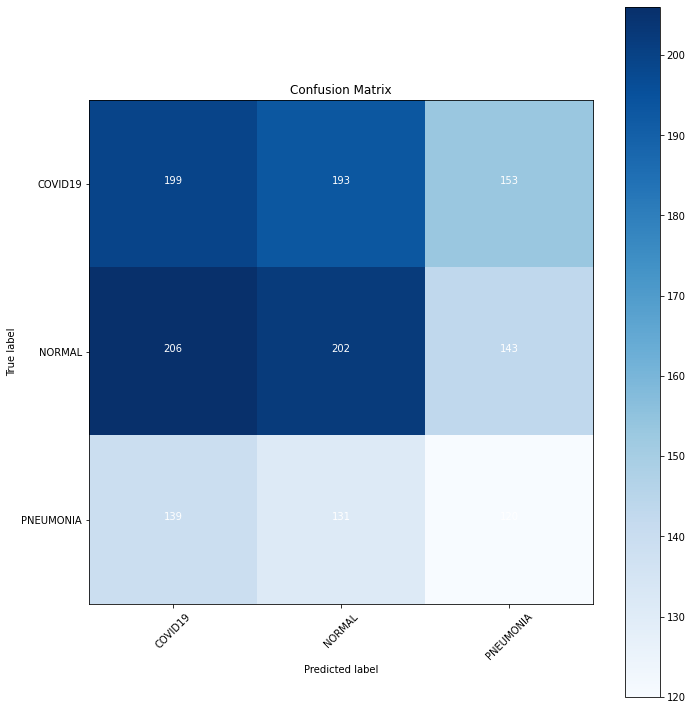

In [ ]:
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [ ]:
print("TOTAL: %3d, PNEUMONIA: %3d, COVID19: %3d, NORMAL: %3d" % (len(list(train_dir.glob('*/*'))), len(list(train_dir.glob('*PNEUMONIA/*'))), len(list(train_dir.glob('*COVID19/*'))), len(list(train_dir.glob('*NORMAL/*')))))
print("TOTAL: %3d, PNEUMONIA: %3d, COVID19: %3d, NORMAL: %3d" % (len(list(test_dir.glob('*/*'))), len(list(test_dir.glob('*PNEUMONIA/*'))), len(list(test_dir.glob('*COVID19/*'))), len(list(test_dir.glob('*NORMAL/*')))))

TOTAL: 11037, PNEUMONIA: 3883, COVID19: 4539, NORMAL: 2615
TOTAL: 1486, PNEUMONIA: 390, COVID19: 545, NORMAL: 551


In [ ]:
plot_confusion_matrix(cm, target_names, normalize=True, title='Confusion Matrix')

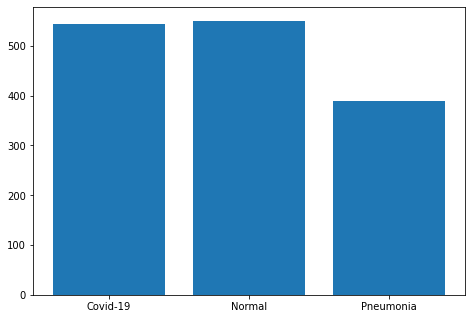

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Covid-19', 'Normal', 'Pneumonia']
students = [len(list(test_dir.glob('*COVID19/*'))), len(list(test_dir.glob('*NORMAL/*'))), len(list(test_dir.glob('*PNEUMONIA/*')))]
ax.bar(langs,students)
plt.show()

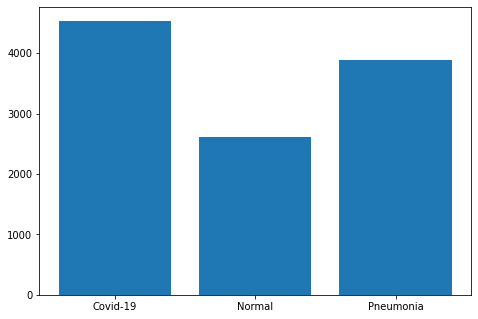

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Covid-19', 'Normal', 'Pneumonia']
students = [len(list(train_dir.glob('*COVID19/*'))), len(list(train_dir.glob('*NORMAL/*'))), len(list(train_dir.glob('*PNEUMONIA/*')))]
ax.bar(langs,students)
plt.show()

In [ ]:
print(Y_pred[150])

[1.0325762e-05 9.9976796e-01 2.2162888e-04]


In [ ]:
print('Classification Report')

print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

     COVID19       0.15      0.14      0.14       167
      NORMAL       0.34      0.35      0.35       325
   PNEUMONIA       0.45      0.44      0.45       398

    accuracy                           0.35       890
   macro avg       0.31      0.31      0.31       890
weighted avg       0.35      0.35      0.35       890

